### Import modules

In [8]:
# Standard imports
import pandas as pd
import sys 
import os
import seaborn as sns
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt

# Local imports
os.chdir('/home/HPC/cdroin/example_DA_study_runIII_PU/master_study/analysis/tune_scan/')
#sys.path.insert(1, os.path.join(sys.path[0], '..'))
import analysis_functions 

# Apply better style
analysis_functions.apply_heatmap_style()



### 30 cm


In [9]:
# Define study
STUDY_NAME = "tune_scan_30cm_neg_oct_correct_scheme"
COLLIDER = "base_collider"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0016/config.yaml"

# SAve study on EOS
SAVE_STUDY_EOS = False
# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)


df

normalized amplitude in xy-plane  \
beam  name base collider num_particles_per_bunch crossing_angle qx     qy     i_oct_b1                                     
lhcb1 base_collider      1.150000e+11            160.0          62.305 60.309 -590.0                                 4.5   
                                                                       60.310 -590.0                                 4.5   
                                                                       60.311 -590.0                                 4.5   
                                                                       60.312 -590.0                                 4.5   
                                                                       60.313 -590.0                                 4.5   
...                                                                                                                  ...   
                                                                62.323 60.328 -590.0                                 4.5   
                                                                       60.329 -590.0                                 4.5   
                                                                62.324 60.328 -590.0                                 4.5   
                                                                       60.329 -590.0                                 4.5   
                                                                62.325 60.329 -590.0                                 4.5   

                                                                                            qx  \
beam  name base collider num_particles_per_bunch crossing_angle qx     qy     i_oct_b1           
lhcb1 base_collider      1.150000e+11            160.0          62.305 60.309 -590.0    62.305   
                                                                       60.310 -590.0    62.305   
                                                                       60.311 -590.0    62.305   
                                                                       60.312 -590.0    62.305   
                                                                       60.313 -590.0    62.305   
...                                                                                        ...   
                                                                62.323 60.328 -590.0    62.323   
                                                                       60.329 -590.0    62.323   
                                                                62.324 60.328 -590.0    62.324   
                                                                       60.329 -590.0    62.324   
                                                                62.325 60.329 -590.0    62.325   

                                                                                            qy  \
beam  name base collider num_particles_per_bunch crossing_angle qx     qy     i_oct_b1           
lhcb1 base_collider      1.150000e+11            160.0          62.305 60.309 -590.0    60.309   
                                                                       60.310 -590.0    60.310   
                                                                       60.311 -590.0    60.311   
                                                                       60.312 -590.0    60.312   
                                                                       60.313 -590.0    60.313   
...                                                                                        ...   
                                                                62.323 60.328 -590.0    60.328   
                                                                       60.329 -590.0    60.329   
                                                                62.324 60.328 -590.0    60.328   
                                                                       60.329 -590.0    60.329   
                        

In [10]:
# Keep only relevant collider
df = df.reset_index(level=1)
df = df[df["name base collider"] == COLLIDER]

# Reshape for plotting
df_to_plot = df.pivot(index="qy", columns="qx", values="normalized amplitude in xy-plane")
df_to_plot

qx,62.305,62.306,62.307,62.308,62.309,62.310,62.311,62.312,62.313,62.314,...,62.316,62.317,62.318,62.319,62.320,62.321,62.322,62.323,62.324,62.325
qy,,,,,,,,,,,,,,,,,,,,,
60.309,4.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.310,4.500,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.311,4.500,4.5,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.312,4.500,4.5,4.5,4.500,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.313,4.500,4.5,4.5,4.531,4.938,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.314,4.500,4.5,4.5,4.531,4.781,5.031,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.315,4.531,4.5,4.5,4.500,4.531,5.062,4.969,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.316,4.500,4.5,4.5,4.500,5.000,4.875,4.875,5.062,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.317,4.500,4.5,4.5,4.594,4.781,4.625,5.000,5.094,4.938,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


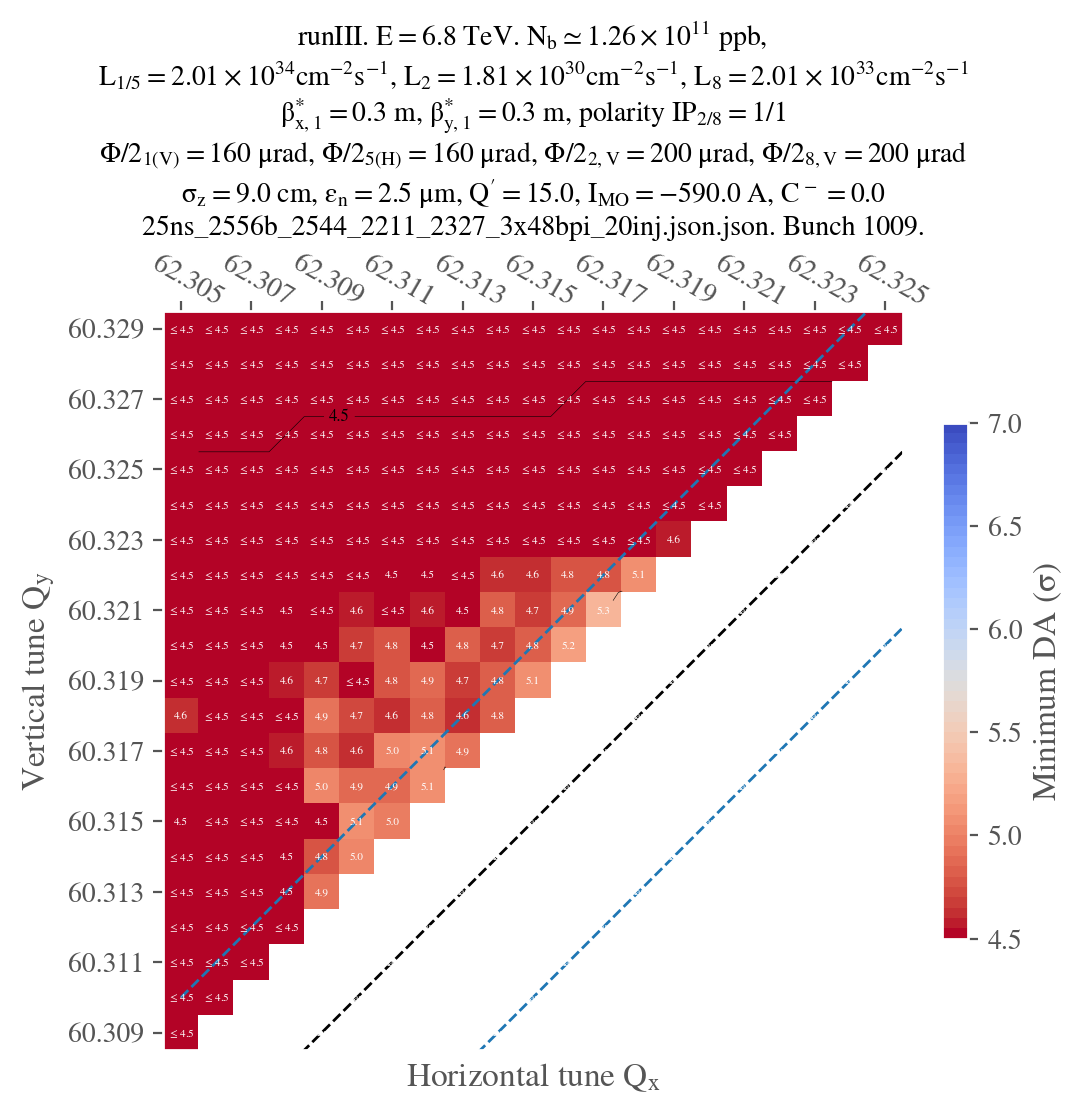

In [11]:

# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    df_to_plot,
    STUDY_NAME + '_' + COLLIDER,
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flatvh",
    betx=0.3,
    bety=0.3,
    Nb = True,
    green_contour = 5.5,
    extended_diagonal=False,
    vmin = 4.5,
    vmax = 7,
)
if SAVE_STUDY_EOS:
    path_archive, path_EOS = analysis_functions.copy_study_on_eos(STUDY_NAME)
    #analysis_functions.archive_and_clean(path_archive, path_EOS)

In [15]:
# Define study
STUDY_NAME = "tune_scan_30cm_neg_oct_correct_scheme"
COLLIDER = "base_collider"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0016/config.yaml"

# SAve study on EOS
SAVE_STUDY_EOS = False
# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da_all.parquet")

# Round all numbers to 3 decimals
df = df.round(3)


df

,start_tracking_at_element,q0,mass0,s,zeta,chi,charge_ratio,weight,pdg_id,particle_id,...,dqx,dqy,i_bunch_b1,i_bunch_b2,num_particles_per_bunch,i_oct_b1,i_oct_b2,crossing_angle,normalized amplitude in xy-plane,angle in xy-plane [deg]
0,-1,1.0,9.382721e+08,0.000,0.236,1.0,1.0,1.0,0,0.0,...,15.0,15.0,1009,1006,1.150000e+11,-590.0,-590.0,160.0,4.500,15.0
1,-1,1.0,9.382721e+08,0.000,0.244,1.0,1.0,1.0,0,1.0,...,15.0,15.0,1009,1006,1.150000e+11,-590.0,-590.0,160.0,4.531,15.0
2,-1,1.0,9.382721e+08,0.000,0.249,1.0,1.0,1.0,0,2.0,...,15.0,15.0,1009,1006,1.150000e+11,-590.0,-590.0,160.0,4.562,15.0
3,-1,1.0,9.382721e+08,0.000,0.251,1.0,1.0,1.0,0,3.0,...,15.0,15.0,1009,1006,1.150000e+11,-590.0,-590.0,160.0,4.594,15.0
4,-1,1.0,9.382721e+08,0.000,0.252,1.0,1.0,1.0,0,4.0,...,15.0,15.0,1009,1006,1.150000e+11,-590.0,-590.0,160.0,4.625,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,-1,1.0,9.382721e+08,8332.897,-0.017,1.0,1.0,1.0,0,480.0,...,15.0,15.0,1009,1006,1.150000e+11,-590.0,-590.0,160.0,7.375,75.0
481,-1,1.0,9.382721e+08,21239.283,-0.297,1.0,1.0,1.0,0,481.0,...,15.0,15.0,1009,1006,1.150000e+11,-590.0,-590.0,160.0,7.406,75.0
482,-1,1.0,9.382721e+08,1288.303,-0.200,1.0,1.0,1.0,0,482.0,...,15.0,15.0,1009,1006,1.150000e+11,-590.0,-590.0,160.0,7.438,75.0
483,-1,1.0,9.382721e+08,24957.292,-0.258,1.0,1.0,1.0,0,483.0,...,15.0,15.0,1009,1006,1.150000e+11,-590.0,-590.0,160.0,7.469,75.0


In [16]:
df = df[(df['qx']==62.313) & (df['qy']==60.318)]
df = df[['normalized amplitude in xy-plane', 'angle in xy-plane [deg]', 'at_turn']]
x_coor = df['normalized amplitude in xy-plane'] * np.cos(df['angle in xy-plane [deg]']/360*2*np.pi)
y_coor = df['normalized amplitude in xy-plane'] * np.sin(df['angle in xy-plane [deg]']/360*2*np.pi)


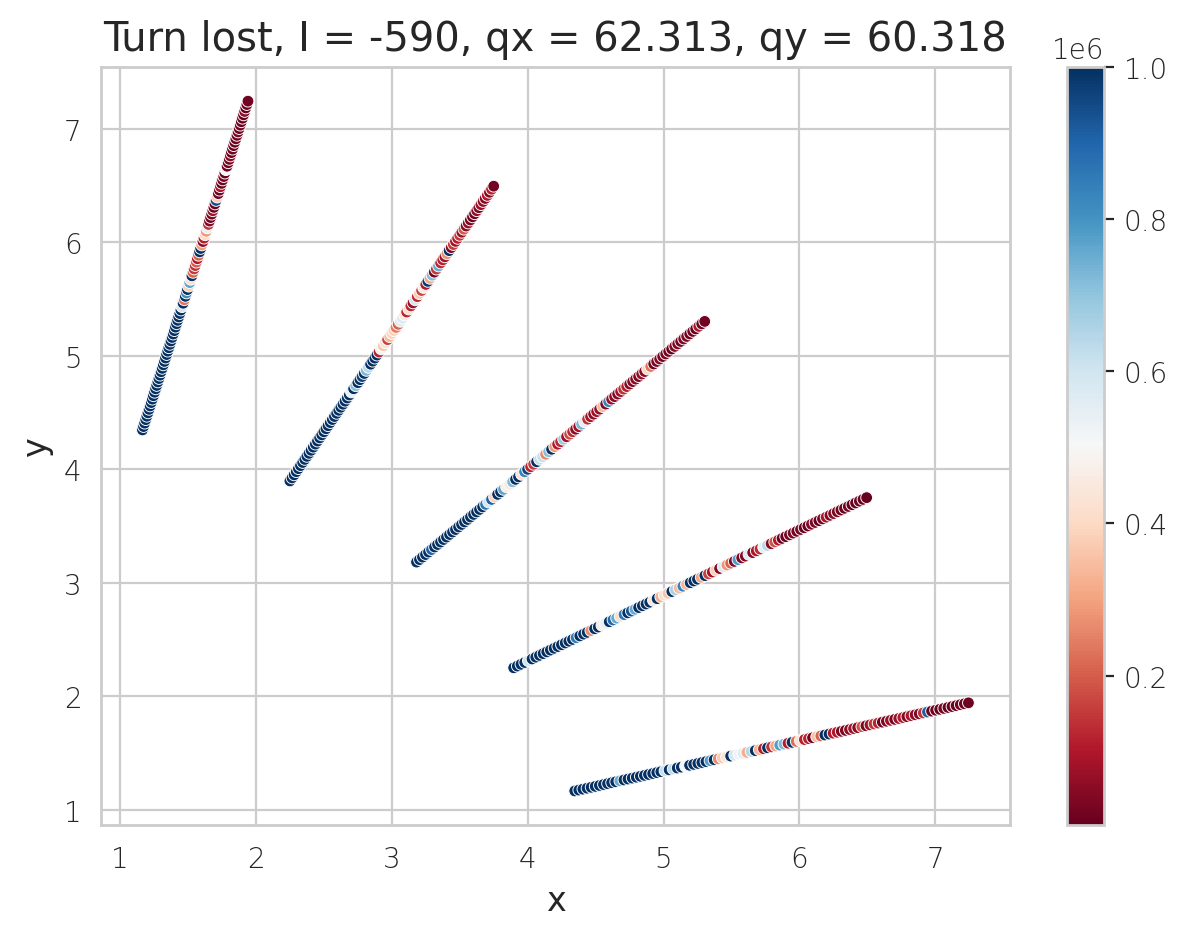

In [17]:

# Scatter plot of x_coor vs y_coor with points colored by at_turn
sns.set_style("whitegrid")
ax = sns.scatterplot(x=x_coor, y=y_coor, hue=df['at_turn'], palette="RdBu", size = 0.5)
plt.title('Turn lost, I = -590, qx = 62.313, qy = 60.318')
plt.xlabel('x')
plt.ylabel('y')

# colorbar
norm = plt.Normalize(df['at_turn'].min(), df['at_turn'].max())
sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
sm.set_array([])
# Remove the legend and add a colorbar
ax.get_legend().remove()
ax.figure.colorbar(sm, ax = ax)
plt.tight_layout()
plt.savefig("plots/turn_lost_neg_oct_qx_62.313_qy_60.318.png")
plt.show()